In [1]:
#https://github.com/wzirui/guided-neural-style/blob/master/stylize.py
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from nst_utils import *
import numpy as np
import tensorflow as tf
from scipy import ndimage, misc
%matplotlib inline

/home/meghanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


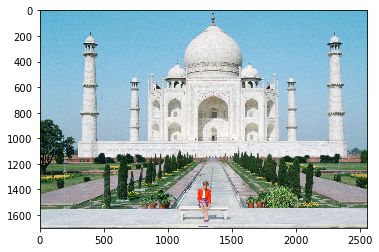

In [22]:
base_image=scipy.misc.imread("Images/taj-mahal-princess-diana (1).jpg")
imshow(base_image)

/home/meghanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


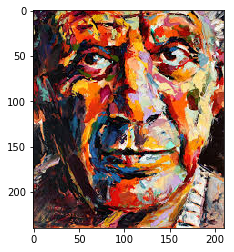

In [23]:
mask_image = scipy.misc.imread("Images/picasso.jpg")
imshow(mask_image)

/home/meghanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


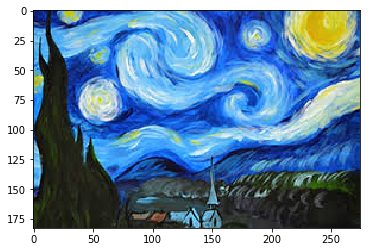

In [24]:
style_reference = scipy.misc.imread("Images/starry_night.jpg")
imshow(style_reference)

In [25]:
from keras.preprocessing.image import load_img,img_to_array
from __future__ import print_function
from scipy.misc import imsave
from scipy.optimize import fmin_l_bfgs_b
import time
from keras.utils import plot_model
from keras.applications import vgg19
from keras import backend as K



In [26]:
def content_cost(a_C,a_G):
    m,n_H,n_W,n_C = a_G.get_shape().as_list()
    a_C_unrolled = tf.transpose(tf.reshape(a_C,[-1]))
    a_G_unrolled = tf.transpose(tf.reshape(a_G,[-1]))
    
    J_content = (1/(4*n_H*n_W*n_C))*tf.reduce_sum(tf.square(tf.subtract(a_C_unrolled,a_G_unrolled)))
    
    return J_content

In [27]:
def gram_matrix(A):
    GA = tf.matmul(A,tf.transpose(A))
    return GA
    

In [28]:
def single_layer_style_cost(a_S,a_G):
    m,n_H,n_W,n_C = a_G.get_shape().as_list()
    
    a_S = tf.transpose((tf.reshape(a_S,[n_H*n_W,n_C])))
    a_G = tf.transpose((tf.reshape(a_G,[n_H*n_W,n_C])))
    
    GS = gram_matrix(a_S)
    GG = gram_matrix(a_G)    
    
    J_style_layer = tf.reduce_sum((GS-GG)**2)/(4*n_C**2*(n_H*n_W)**2)
    
    return J_style_layer
    
    

In [51]:
STYLE_LAYERS = [
    ('conv1_1', 0.256),
    ('conv2_1', 0.230),
    ('conv3_1', 0.12),
    ('conv4_1', 0.232),
    ('conv5_1', 0.143)]

In [52]:
def compute_style_cost(model,STYLE_LAYERS):
    J_style = 0
    
    for layer_name,coeff in STYLE_LAYERS :
        out = model[layer_name]
        a_S = sess.run(out)
        a_G = out
        J_style_layer = single_layer_style_cost(a_S,a_G)
        J_style += coeff * J_style_layer

    return J_style
        
        
    
    

In [53]:
model = load_vgg_model("vgg19fm.mat")
print(model)

{'input': <tf.Variable 'Variable:0' shape=(1, 300, 400, 3) dtype=float32_ref>, 'conv1_1': <tf.Tensor 'Relu:0' shape=(1, 300, 400, 64) dtype=float32>, 'conv1_2': <tf.Tensor 'Relu_1:0' shape=(1, 300, 400, 64) dtype=float32>, 'avgpool1': <tf.Tensor 'AvgPool:0' shape=(1, 150, 200, 64) dtype=float32>, 'conv2_1': <tf.Tensor 'Relu_2:0' shape=(1, 150, 200, 128) dtype=float32>, 'conv2_2': <tf.Tensor 'Relu_3:0' shape=(1, 150, 200, 128) dtype=float32>, 'avgpool2': <tf.Tensor 'AvgPool_1:0' shape=(1, 75, 100, 128) dtype=float32>, 'conv3_1': <tf.Tensor 'Relu_4:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_2': <tf.Tensor 'Relu_5:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_3': <tf.Tensor 'Relu_6:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_4': <tf.Tensor 'Relu_7:0' shape=(1, 75, 100, 256) dtype=float32>, 'avgpool3': <tf.Tensor 'AvgPool_2:0' shape=(1, 38, 50, 256) dtype=float32>, 'conv4_1': <tf.Tensor 'Relu_8:0' shape=(1, 38, 50, 512) dtype=float32>, 'conv4_2': <tf.Tensor 'Relu_9:0' shap

In [54]:
def total_cost(J_content, J_style, alpha = 10, beta = 40):
    J = (alpha * J_content) + (beta * J_style)
    return J

In [55]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [56]:
content_image = scipy.misc.imread("Images/taj-mahal-princess-diana (1).jpg")
style_reference = scipy.misc.imread("Images/starry_night.jpg")
print(content_image.shape)
print(style_reference.shape)

(1700, 2560, 3)
(183, 275, 3)


/home/meghanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/meghanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


/home/meghanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/meghanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


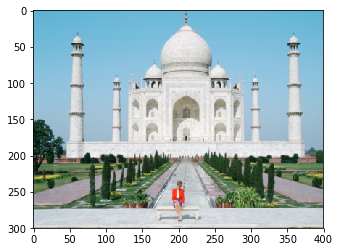

In [57]:
h,w= 300,400 
content_image = misc.imresize(content_image,(h,w))
#mask_image=misc.imresize(mask_image,(h,w))
style_reference=misc.imresize(style_reference,(h,w))
imshow(content_image)

In [58]:
content_image = reshape_and_normalize_image(content_image)

In [59]:
style_image = reshape_and_normalize_image(style_reference)

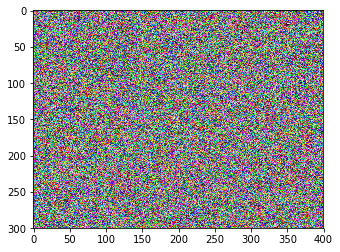

In [60]:
generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [61]:
model = load_vgg_model("vgg19fm.mat")

In [62]:

sess.run(model['input'].assign(content_image))
out = model['conv4_2']
a_C = sess.run(out)
a_G = out
J_content = content_cost(a_C, a_G)
print(J_content)

Tensor("mul:0", shape=(), dtype=float32)


In [63]:
sess.run(model['input'].assign(style_image))
J_style = compute_style_cost(model,STYLE_LAYERS)
print(J_style)

Tensor("add_20:0", shape=(), dtype=float32)


In [64]:
J = total_cost(J_content, J_style, alpha = 10, beta = 40)

In [65]:
optimizer = tf.train.AdamOptimizer(2.0)
train_step = optimizer.minimize(J)

In [66]:
def model_nn(sess, input_image, num_iterations = 1000):

    sess.run(tf.global_variables_initializer())

    

    sess.run(model['input'].assign(input_image)) 
    
    for i in range(num_iterations):
    
        sess.run(train_step)

        

        generated_image = sess.run(model['input'])

        # Print every 20 iteration.
        if i%1000 == 0:
            Jt, Jc, Js = sess.run([J, J_content, J_style])
            print("Iteration " + str(i) + " :")
            print("total cost = " + str(Jt))
            print("content cost = " + str(Jc))
            print("style cost = " + str(Js))
            
            # save current generated image in the "/output" directory
            save_image("output2/" + str(i) + ".png", generated_image)
    
    # save last generated image
    save_image('output2/generated_image1.jpg', generated_image)
    
    return generated_image

In [67]:
model_nn(sess, generated_image)

Iteration 0 :
total cost = 30969145000.0
content cost = 8926.521
style cost = 774226370.0


array([[[[ -49.13577  ,   85.25287  ,  132.3213   ],
         [ -59.496696 ,  137.03415  ,  158.23244  ],
         [ -29.555899 ,  139.65317  ,  148.61378  ],
         ...,
         [  -4.8131433,  105.634186 ,  101.04915  ],
         [ -17.962536 ,   73.20716  ,   92.994    ],
         [-136.87889  ,  -68.42398  ,   28.879831 ]],

        [[ -57.87713  ,   85.51684  ,  143.53976  ],
         [-176.31888  ,   64.47572  ,  315.5245   ],
         [ -91.10405  ,   58.02024  ,  216.69896  ],
         ...,
         [ -15.251919 ,   74.91531  ,   66.73155  ],
         [ -78.07114  ,   40.889065 ,   77.09737  ],
         [ -75.02023  ,  -38.252052 ,   14.877358 ]],

        [[ -76.26146  ,   62.812317 ,  183.36911  ],
         [ -28.68105  ,   51.643627 ,  149.64603  ],
         [ -55.795    ,   68.073784 ,  203.93417  ],
         ...,
         [ -66.389175 ,   60.75358  ,   78.45241  ],
         [ -78.97629  ,    8.281251 ,   75.1034   ],
         [ -57.411167 ,  -17.542032 ,   14.541779 ]],